[*********************100%***********************]  31 of 31 completed


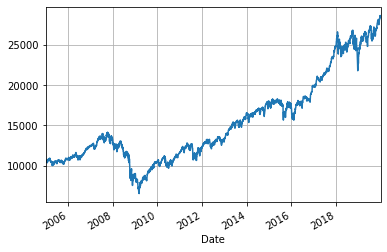

In [12]:
# Download Data from Yahoo Finance
import datetime
import matplotlib.pyplot as plt
import pandas as pd
# Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance
import yfinance as yf 
import numpy as np
start_sp = datetime.datetime(2004,12,31)
end_sp = datetime.datetime(2019, 12,31)

# Dow Jones index
# 1st Dow Jones Index + 30 components
dow30 = ['^DJI','AXP', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'XOM',
         'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM',
         'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG',
         'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS']

Dow_data = yf.download(dow30, start=start_sp, end=end_sp,group_by="ticker")

# To access the adjusted close price, use
Dow_data['^DJI']['Close']

# Graph data
Dow_data['^DJI']['Close'].plot(grid=True)

In [5]:
#Question 1
#a)
#print(Dow_data)

In [13]:
stocks=np.array(Dow_data)

In [24]:
i=0
j=4
k=0
rendement=np.zeros((len(stocks)-1,31))
moyenne=np.zeros((1,31))
ecarttype=np.zeros((1,31))
while i<len(stocks)-1:
    while j<len(stocks[0])-1:
        rendement[i,k]=(-stocks[i,j]+stocks[i+1,j])*100/stocks[i,j]
        j=j+6
        k=k+1
    i=i+1
    k=0
    j=4
rendement=np.nan_to_num(rendement, copy=True, nan=0.0, posinf=None, neginf=None)
print(rendement)

[[ 0.         -2.28243505 -0.10102896 ...  0.          0.17988699
   0.24657351]
 [ 0.         -0.67882171 -2.16333658 ... -3.93376877 -1.077232
  -1.20246094]
 [ 0.         -0.52260761 -1.01262749 ...  0.05385822 -0.54446427
  -0.60860329]
 ...
 [ 0.12158793 -0.34221856  0.         ... -0.16718532  0.03431919
  -0.4452292 ]
 [-0.82369585 -0.58663047 -2.25953026 ... -0.37680899 -1.35848763
  -0.89445777]
 [ 0.03726352  0.43177232  3.06629636 ...  0.77747875  0.59817805
   0.72202098]]


In [52]:
#Taux Periodique annuel
tauxAnnee=np.zeros((15,31))
i=0
for i in range(15):
    tauxAnnee[i,:]=rendement[262*i:262*(i+1),:].sum(axis=0)
#Ecart Type
ecartType=np.std(tauxAnnee,axis=0)

#Matrice Covariance
np.cov(tauxAnnee)


array([[ 5.05212077e+02, -1.72641224e+01,  1.49095574e+02,
         1.88643167e+01,  1.57510537e+02,  1.56731630e+02,
         1.03040042e+02, -1.98958594e+02,  1.02739991e+02,
         9.86585639e+01, -1.09293958e+02,  1.77532927e+02,
         1.27676725e+02, -2.93124017e+01,  1.19367154e+02],
       [-1.72641224e+01,  2.14638384e+02,  2.28209755e+01,
         8.56675183e+01, -8.30770579e+01, -5.79378206e+01,
        -1.10487957e+02,  6.48602974e+01, -3.46280486e+01,
        -3.93738106e+01, -5.51368208e+01,  7.42351704e-01,
        -2.40569329e+01,  5.93278315e+01, -3.37832673e+01],
       [ 1.49095574e+02,  2.28209755e+01,  2.44227652e+02,
         1.56442148e+02, -1.30412025e+02,  1.11568782e+02,
         6.44516451e+01, -1.16586636e+02, -7.70178296e+00,
        -4.46141219e+01, -3.03795194e+00, -3.40537359e+01,
        -1.66957312e+01,  6.53881728e+00,  5.09291544e+01],
       [ 1.88643167e+01,  8.56675183e+01,  1.56442148e+02,
         1.47603170e+03, -1.10042062e+03, -1.87004361

In [53]:
#Matrice de corrélation
np.corrcoef(tauxAnnee)

array([[ 1.        , -0.05242687,  0.42445385,  0.02184522,  0.19352372,
         0.33880464,  0.25076365, -0.53894124,  0.36702895,  0.24682004,
        -0.38102795,  0.51844188,  0.25339814, -0.08680769,  0.51498586],
       [-0.05242687,  1.        ,  0.09967428,  0.1522    , -0.15659896,
        -0.19214895, -0.41253107,  0.26955092, -0.18978941, -0.15112498,
        -0.29490733,  0.00332594, -0.07325126,  0.26955566, -0.22361209],
       [ 0.42445385,  0.09967428,  1.        ,  0.26056046, -0.23045264,
         0.34687646,  0.22559631, -0.45422071, -0.03957232, -0.16053045,
        -0.01523285, -0.14302942, -0.04765809,  0.0278513 ,  0.31602131],
       [ 0.02184522,  0.1522    ,  0.26056046,  1.        , -0.79099245,
        -0.23650125,  0.34100515,  0.18995312, -0.59053531,  0.09659937,
         0.19423383, -0.21072115,  0.17813129,  0.51353402,  0.06109027],
       [ 0.19352372, -0.15659896, -0.23045264, -0.79099245,  1.        ,
         0.15438739, -0.03031209, -0.28656573, 

In [1]:
print("salut")

salut


In [ ]:
bonjour
